## Topics

Python has a rich standard library, as we've seen throughout this class. This week we will start discussing the Python scientific stack specifically we will look at three of the most popular Python open source scientific libraries:

- [`numpy`](https://numpy.org/doc/) ** in recorded lecture this week
- [`pandas`](https://pandas.pydata.org/docs/) ** in recorded lecture next week
- [`matplotlib`](https://matplotlib.org/3.3.2/contents.html) ** in live lecture this week

**Optional readings for this week and next**

Python Data Science Handbook, Jake VanderPlaas

Available electronically via UChicago Library's Safari account

- Chapter 2: Introduction to NumPy
- Chapter 3: Data Manipulation with Pandas
- Chapter 4: Visualization with Matplotlib

### Video 1: A note on installing your Python packages

The standard Python packakage manager, or the tool you use to install Python packages not included in the Python standard libary, is [`pip`](https://pip.pypa.io/en/stable/).

The [Python Package Index](https://pypi.org/) (PyPi), is:

- free to use (maintained and funded by the Python Software Foundation!)
- allows you to also publish your own packages
- discover new packages
- handles installation and uninstallation of packages `pip install package_name`

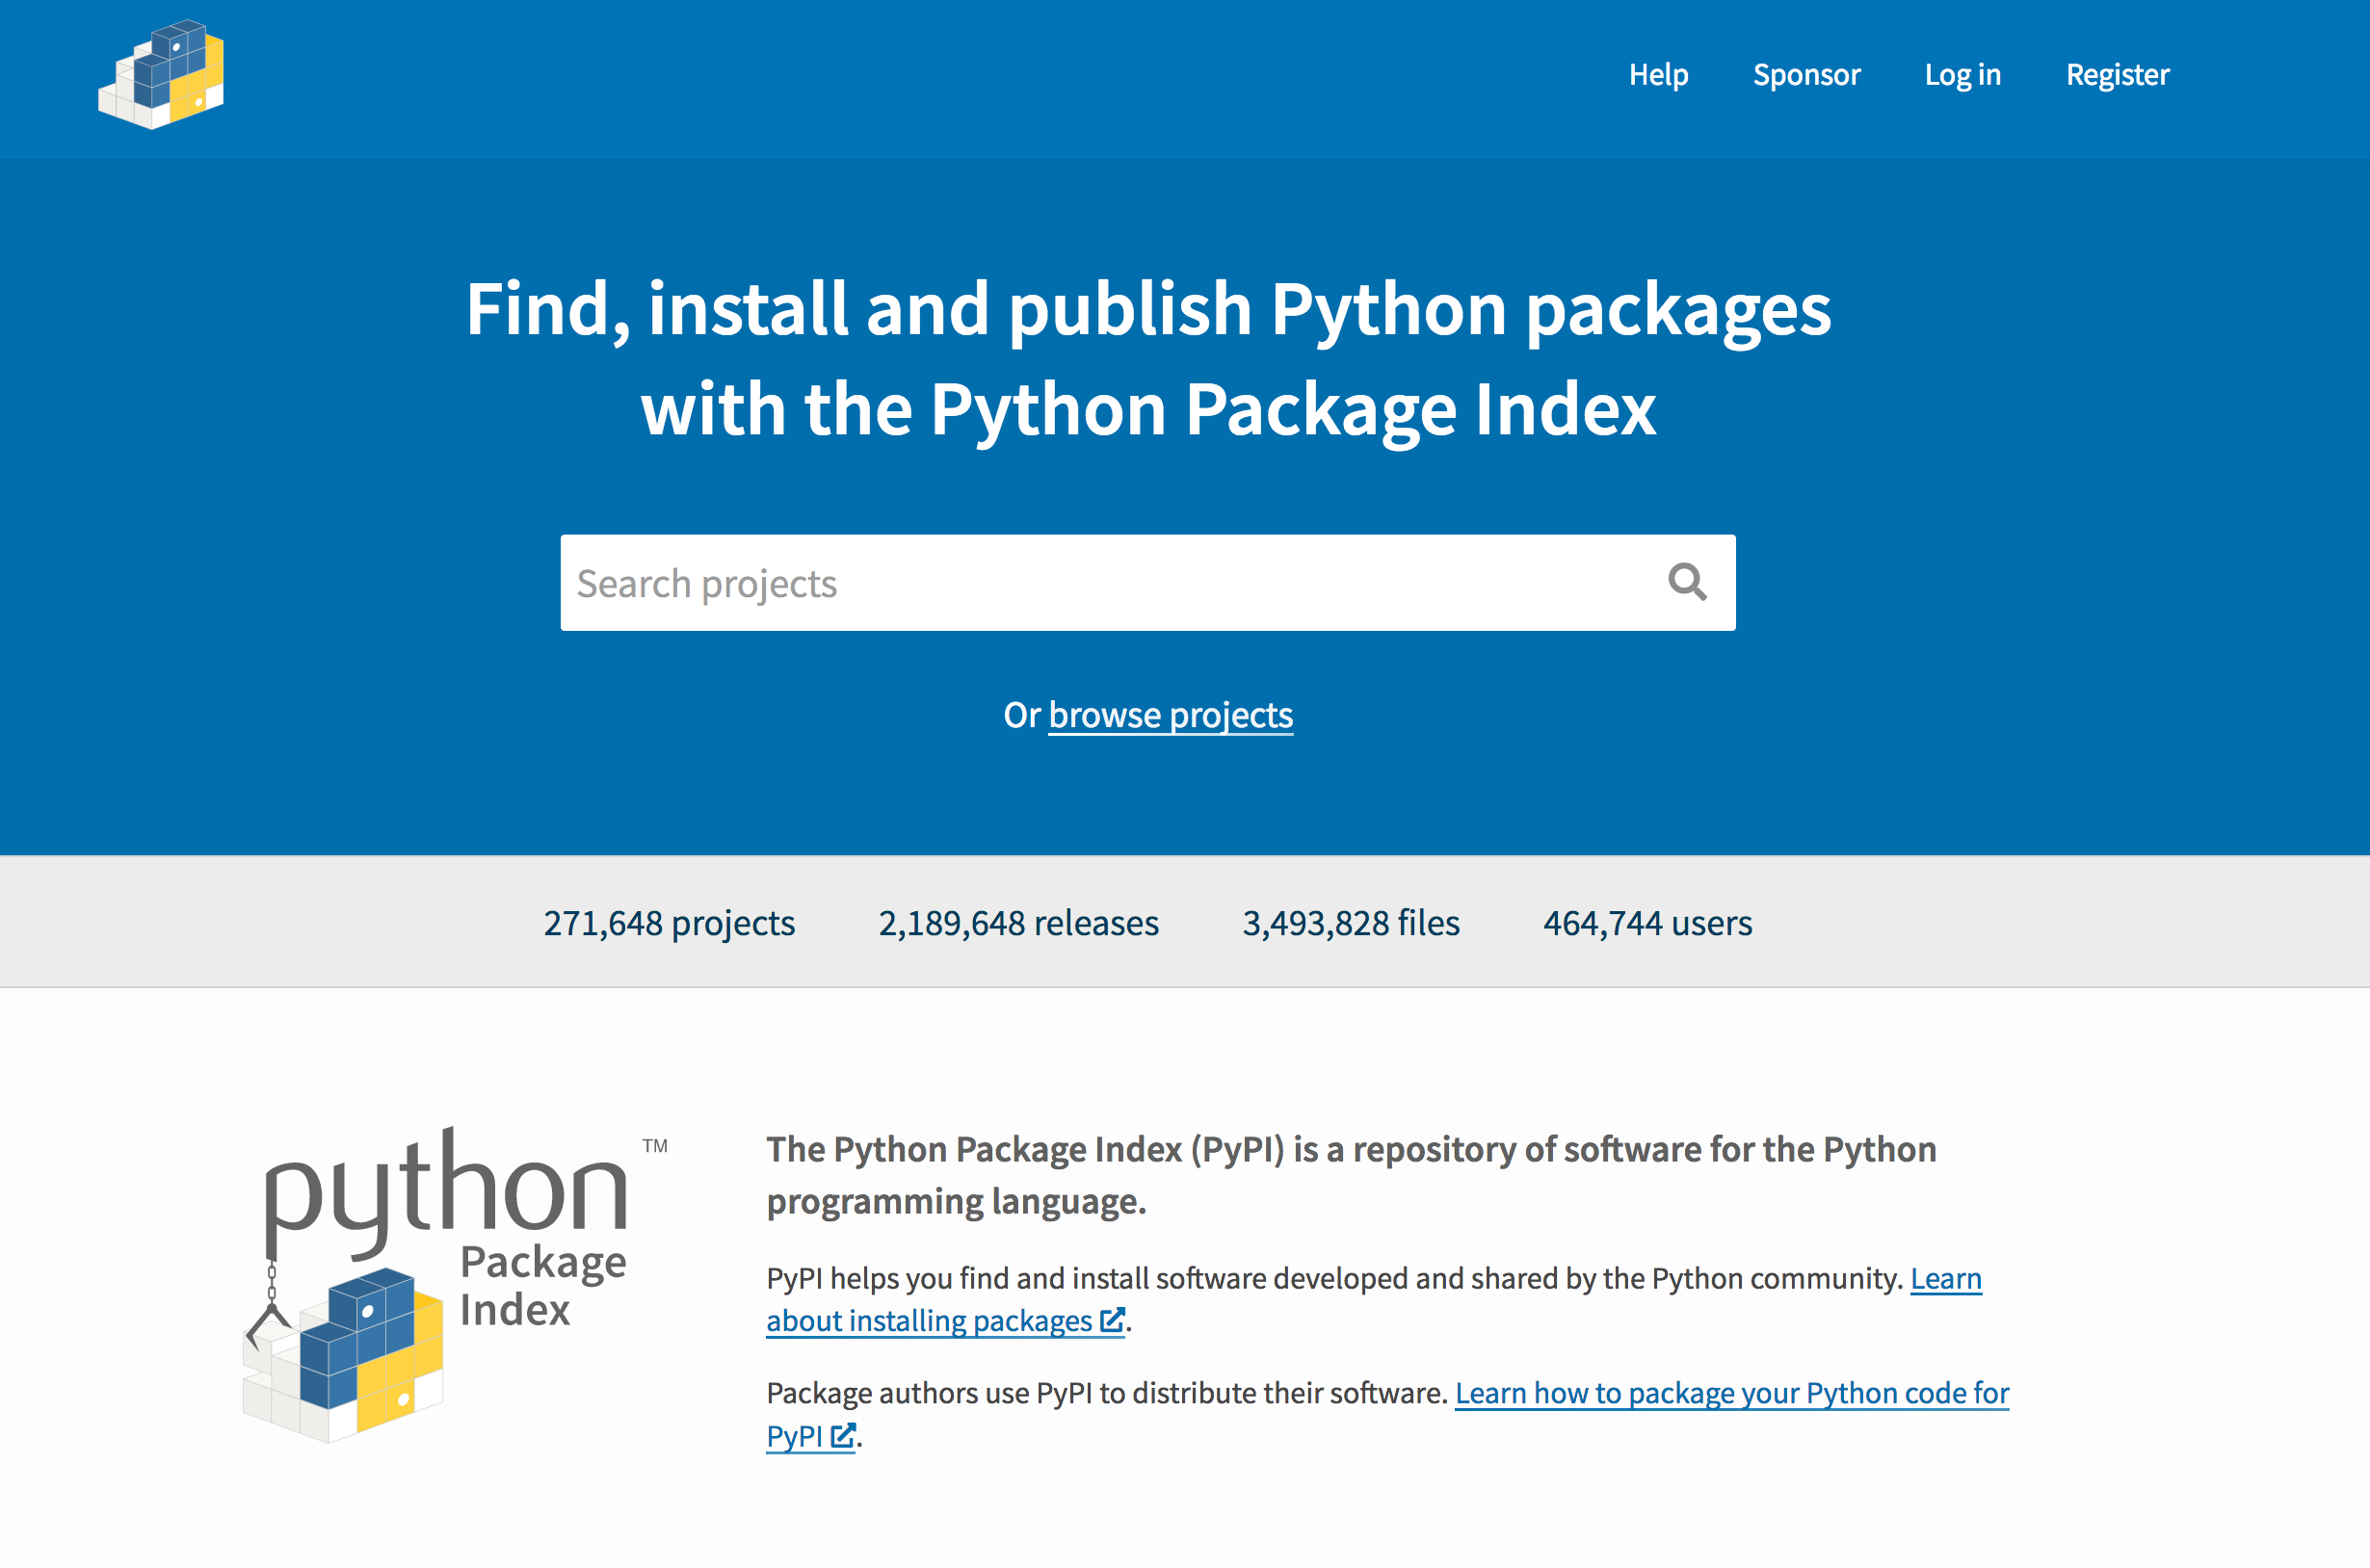

*conda package manager*

If you installed Python with `conda`, an alternative packaging system popularized by the Python and R scientific programming community, you will need to use `conda` to install your packages. Read more [here](https://docs.conda.io/en/latest/).

### Python Data Model

When we discussed the [Python data model](https://docs.python.org/3/reference/datamodel.html) we discussed that the composition of Python objects include:

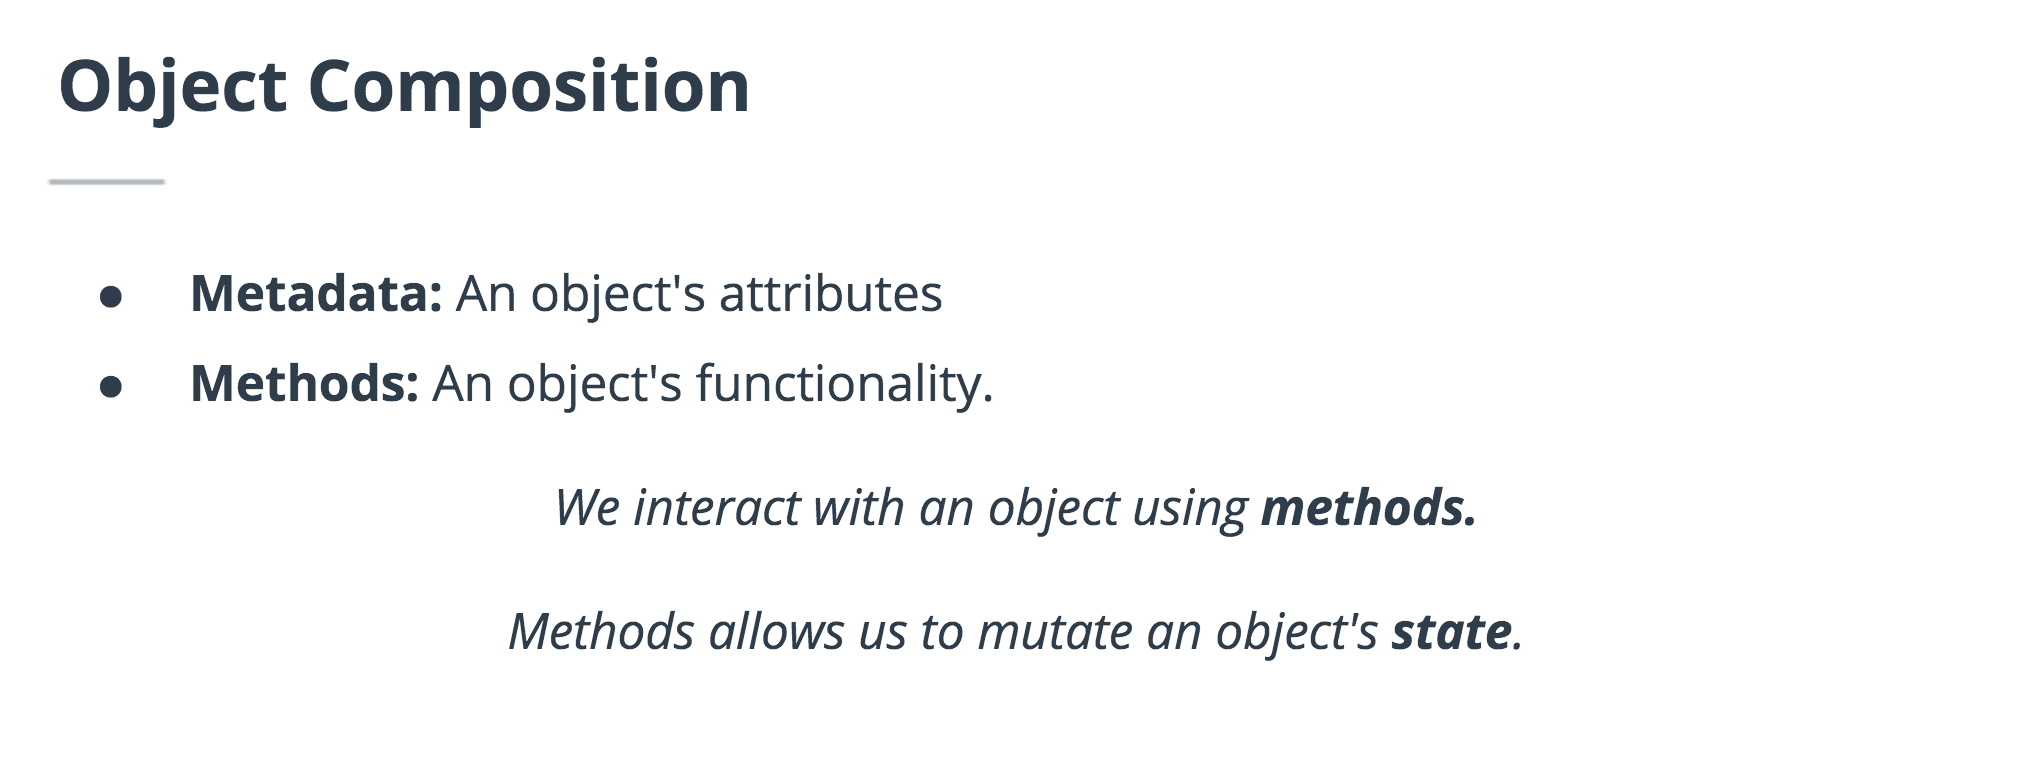

All Python objects descend from [`PyObject`](https://docs.python.org/3/c-api/structures.html#c.PyObject) which includes:

- `Py_REFCNT` - reference count for garbage collection
- `Py_TYPE` - the object type
- `Py_SIZE` - size of data members (for an object with a notion of length)

Python objects, in effect, are wrappers around C structures 

### Comparing an Integer in C to an integer in Python

In C the integer is a label with a memory position, "whose bytes encode an integer value"

In Python an integer points to a memory position not only the bytes with the value but also these additional attributes specifying the object


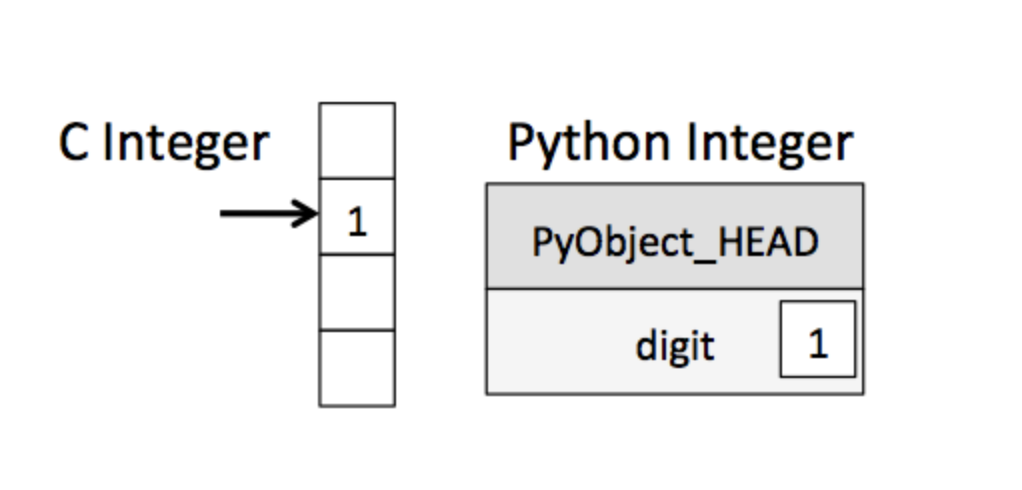
Source: [Jake VanderPlas - Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html)

### Python `List`s are great! 

A `list` in Python:

- heterogenous collection 
- of varied length

```
up_to_ten = list(range(10))
days_week = [{1: "Monday"}, {2:"Tuesday"}, "Wednesday" ]
```

As a heterogenous collection the `list` must container members that understand:

- their own type
- their reference count
- and other fundamental information

If our list is only a `list` of `int`, we are repeating a significant amount of information!

### NumPy Array vs Python List

<img src="images/array_vs_list.png">

Source: [Jake VanderPlas - Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html)

NumPy array is fixed-type, and a pointer to a continuous row of data yielding the following advantages:

- Less to store!
- Easier to manipulate!

**Note: Python has a fixed-type array but it lacks the operational efficiency of NumPy arrays**

In [ ]:
import array

up_to_ten = list(array.array(
    'i', range(10) # i specifies type
)) 
help(array.array)

### Video 2: Working with NumPy Arrays

In [ ]:
import numpy as np

In [ ]:
evens_up_to_ten = np.array(range(2,10)) 
print(evens_up_to_ten)

In [ ]:
evens_up_to_ten_again = np.array([2.0,5,6,8,10.0])
print(evens_up_to_ten_again)

**Remember: NumPy arrays are *fixed* type, so in the second example above we see that NumPy casts the `int` to a `float64`**

In [ ]:
print(type(evens_up_to_ten[0]))
print(type(evens_up_to_ten_again[1]))

In [ ]:
help(np.array([2.0,5,6,8,10.0]))

In [ ]:
evens_up_to_ten_third = np.array([2.0,5,6,8,10.0], dtype='float32')
print(type(evens_up_to_ten_third[1]))

Some of the standard data types in NumPy:

| Type | Explanation |
| -- | -- |
| int8 | Byte (-128 to 127) |
| int16 | Integer (-32768 to 32767) |
| int32 | Integer (-2147483648 to 2147483647) |
| int64 | Integer (-9223372036854775808 to 9223372036854775807) |

For the rest you can read [here](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html#NumPy-Standard-Data-Types).

### Multidemensional NumPy Arrays!

Our previous examples are all one-axis (or one-demensional) arrays. However we can have many dimensions! You can observe the number of axes (or dimensions) in your ndarray with `rank`, `ndim`, and `shape`.

In [ ]:
many_dimensions = np.array([
    [1.1,1.2,1.3],
    [2.1,2.2,2.3]
], dtype='float32')

print(many_dimensions[0,1])        # 0th element, 1st element
print(many_dimensions[0,:])        # All of 0th element
print(many_dimensions[0:2,2:4])    # Only subset of 0th and 1st element 

In [ ]:
print(many_dimensions.shape)  # axes X len(array)
print(many_dimensions.size)   # Number of elements in the array on all axes
print(many_dimensions.ndim)

### Other useful NumPy array attributes

- `dtype` to tell you the type of your elements
- `nbytes` size of array in bytes
- `itemsize` size of each element in bytes

### Populating NumPy Arrays!

There are a few methods available for you to populate an ndarray such as:

- `zeros` which accepts a parameter for number of zeros or a tuple representing the desired shape and `dtype`
- `ones` which has the same parameters as `zero`
- `full` which rather than a `dtype` takes in a value to populate with

In [ ]:
zeros_arr = np.zeros(10, dtype='float64')
ones_arr = np.ones((3,3), dtype='int64')
pi_arr = np.full((2,2), 3.14)

print(zeros_arr)
print("---------")
print(ones_arr)
print("---------")
print(pi_arr)

There are more ways to fill your arrays too, here are some others:

- `np.random.random` to create a uniformly-distributed array with balues between 0 to 1
- `np.arange` to create a linear sequence stepping with given value
- `np.linspace` create values evenly spaced between start and endpoint

In [ ]:
random_two_by_two = np.random.random((2,2))
by_three = np.arange(9,21,3)
up_to_six = np.linspace(0,1,6)

print(random_two_by_two)
print("---------")
print(by_three)
print("---------")
print(up_to_six)

Lastly, you can create an identity matrix as such with `eye`

In [ ]:
four_by_four = np.eye(4)
print(four_by_four.shape)
print(four_by_four)

### Changing the shape of an NumPy array!

There are a few options available to change your array shape including:

- `reshape` - to specify the desired dimensions and length so long as the original size matches the resulting size
- `resize` - to resize in place
- `ravel` - to flatten into a 1D array

In [ ]:
many_dimensions = np.array([
    [1.1,1.2,1.3,1.4,1.5],
    [2.1,2.2,2.3,2.4,2.5]
], dtype='float32')

reshaped = many_dimensions.reshape(5,2)
print(reshaped)
print(reshaped.ravel())
many_dimensions.resize(2,5)
print(many_dimensions)

### Working with NumPy arrays continued: Concatenation of NumPy Arrays

- `np.concatenate` concatenate!
- `np.vstack` vertically stack the arrays
- `np.hstack` horizontally stack the arrays

In [ ]:
x = np.array([1,2,3])
y = np.array([6,5,4])
z = np.array([9,10,11])
print(np.concatenate([x, y]))
print(np.concatenate([x, y, z]))

# concatenate multidimensional arrays!

up_to_six = np.array([
    [1,2,3],
    [4,5,6]
])
pi_arr = np.full((2,3), 3.14)

print(np.concatenate([
    up_to_six, pi_arr
]))

In [ ]:
# Vertically stack the arrays! 

print(np.vstack([
    up_to_six, pi_arr
]))

# Horizontally stack the arrays! 

print(np.hstack([
    up_to_six, pi_arr
]))

### Splitting!

Provide a list of indices where to split using:
- `np.split` - into multiple subarrays
- `np.hsplit` - horizontal
- `np.vsplit` - vertical

In [ ]:
multi_dimensional = np.hstack([
    up_to_six, pi_arr
])
one, two = np.split(multi_dimensional, 2)
print(one)
print(two)
print(one.shape)
print("=======")
left, right = np.hsplit(multi_dimensional, 2)
print(left)
print(right)

### Video 3: Operations on NumPy Arrays

NumPy provides operations optimized for computation on arrays of data."The key to making it fast is to use vectorized operations, generally implemented through NumPy's universal functions (ufuncs)."

Other implementations of Python have sought to overcome Python's slowness due to the overhead spent on type checking like:

- Cython
- PyPy
- Numba

Vectorized operations via ufuncs is another workaround: "Ufuncs are optimized to execute repeated operations on ... NumPy arrays ... they gain a larger advantage as the arrays go larger"

To "vectorize" the operation, is to push the loop into the compiled layer underlying NumPy"

### Array Arithmetic

Ufuncs can operator on two inputs - single (unary) and two (binary). These make use of Python's native arithmetic operators (e.g. "+").

In [ ]:
arr = np.arange(4)
print("x     =", arr)
print("x + 5 =", arr + 5)
print("x - 5 =", arr - 5)
print("x * 2 =", arr * 2)
print("x / 2 =", arr / 2)
print("x // 2 =", arr // 2)  # floor division

In [ ]:
-(0.5*x + 1) ** 2  # You can combine into a single operation too!

The arithmetic operators call the NumPy ufuncs:

| Operator | ufunc |
| -- | -- |
| + | np.add |
| - | np.subtract | 
| - | np.negative (e.g. unary negation) |
| * | np.multiply |
| / | np.divide |
| // | np.floor_divide | 
| ** | np.power | 
| % | np.mod |

Additional UFuncs include:

- trigonometric functions like `sin`, `cos`, `theta`
- exponents and logarithms like `exp` and `power`
- specialized funcs UFuncs in `scipy.special`

### Aggregation Functions

Many included such as: `sum`, `min`, `max`, `std`, and more! For entire list see [here](https://jakevdp.github.io/PythonDataScienceHandbook/02.04-computation-on-arrays-aggregates.html#Other-aggregation-functions).

In [ ]:
r = np.random.random(100)
# print(r)
print(np.sum(r))
print(np.min(r))
print(np.max(r))
print(np.mean(r))
print(np.std(r))
print(np.argmin(r))
print(np.argmax(r))
print(np.percentile(r, 25))
print(np.median(r))
print(np.var(r))

### Operations on NumPy Arrays: Broadcasting

Binary operations can be applied to not only on arrays of the same size (e.g. `a + b` where a and b are both same size) but on arrays of different sizes:

In [ ]:
a = np.full((1,5), 1)
print(a)
print(a + 2)

b = np.ones((3,5))
print(a + b)

The smaller array, a is being stretched or broadcast over the larger array, b's second dimension to match its shape.

<img src="images/broadcasting.png"/>

**Note: No extra memory is allocated**

**Rules**
- 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.


### Comparison Operators

NumPy also implements comparison operators such as < (less than) and > (greater than) as element-wise ufuncs:.

| Operator | UFunc |
| -- | -- |
| == | np.equal |
| != | np.not_equal |
| < | np.less |
| <= | np.less_equal |
| > | np.greater |
| >= | np.greater_equal | 

In [ ]:
# Again work on arrays of any size and shape!

random_arr = np.random.randint(100, size=(4,4))
print(random_arr)
print(random_arr < 6)

Additionally like the `any` and `all` functions in Python, NumPy has an implementation too that:

- `any` - will be True is any value meets requirement
- `all` - will be True is ALL values meet requirement

In [ ]:
print(f'Max value: {random_arr.max()}')

print(np.any(random_arr < 0))
print(np.any(random_arr < 89))
print(np.any(random_arr < 90))
print("--------")
print(np.all(random_arr < 91))
print(np.all(random_arr <= 90))
print(np.all(random_arr < 89))

### Boolean Logical Operators as UFuncs

We don't use the `and` and `or` keywordsbecause they will effectively evaluate the truthor falsehood of the entire object. Instead, we'reinterested in the bits within each object. We'reperforming multiple Boolean evaluations onthe content of the object.

| Operator | UFunc |
| -- | -- |
| & | np.bitwise_and |
| pipe| np.bitwise_or |
| ^ | np.bitwise_xor |
| ~ | np.bitwise_not |

### Boolean Arrays as Masks

Using Boolean arrays as masks to select specific subsets can be useful!


In [ ]:
random_arr = np.random.randint(200, size=(6,))
print(random_arr)
print((random_arr > 50) & (random_arr < 160))
print(random_arr[(random_arr > 50) & (random_arr < 160)])

### Video 4: Fancy Indexing

With fancy indexing, we can pass an array or list into square brackets to samplethe original array. The shape of the result reflects the shape of the index arrays,rather than the shape of the array being indexed.

In [ ]:
random_arr = np.random.randint(200, size=(10,))
print(random_arr)
indexes = [3,6,9]
print(random_arr[indexes])
indexes_two = np.array([[0, 9], [2, 7]])
print(random_arr[indexes_two])

### Sorting Arrays

Python has built-in `sort` and `sorted` functions. NumPy's `np.sort` function is much more efficient. `np.sort` uses `O(n*lg n)` (`quicksort`), but `mergesort` and `heapsort` are available.

In [ ]:
random_arr = np.random.randint(200, size=(10,))
print(random_arr)
print('----')
print(np.sort(random_arr))
print(np.argsort(random_arr))   # Shows the index of the original position before sorting

### Structured Arrays

NumPy's structured arrays or record arrays provide efficient storage forcompound, heterogeneous date:

In [ ]:
names = ['James T Kirk', 'Jean-Luc Picard', 'Benjamin Sisko', 'Kathryn Janeway', 'Jonathan Archer', 'Gabriel Lorca', 'Saru']
ranking = [7, 1, 2, 3, 6, 5, 4]

# Create structure aray with all zeros
star_trek_captains = np.zeros(7, dtype={'names': ('name', 'ranking'), 'formats': ('U15', 'i4')})

# Populate with data!
star_trek_captains['name'] = names
star_trek_captains['ranking'] = ranking

# Sort based on my very biased ranking!
star_trek_captains = np.sort(star_trek_captains, order='ranking')

print(star_trek_captains)
print(star_trek_captains.shape)
print(star_trek_captains.ndim)

NumPy's structured arrays or record arrays provide efficient storage forcompound, heterogeneous data:

In [ ]:
print(f' My favorite Star Trek Captain is: {star_trek_captains[0]["name"]}!')

**In LIVE lecture we will cover some hands on exercises using `NumPy` as well as some basic data visualization using `matplotlib`!** 

**Next week's RECORDED lecture we will cover `pandas`!**